# THE NUMBER OF JUPYTER NOTEBOOK REPOS ON GITHUB

**Keith E. Maull<sup>^1</sup>**

September 18, 2018

1. NCAR Library, National Center for Atmospheric Research

## SUMMARY

In the [prior work](./0_explore_nbrepo_estimate.ipynb) we began a basic exploration of the number of repos that were listed as "Jupyer Notebook" repos (a definition which requires more detail).  In any event, these repos are one's which return data via the Github API with the following query:

```html
/search/repositories?q=language:"Jupyter Notebook"+is:public')
```

We would like to answer a few questions though:

* which of these repos are *top* (by stars) and what is in these repos - is there some interesting pattern about these that might help us understand the remaining repos
* what is the _mix_ and _ratio_ of jupyter notebook files to other files in the repo and what can that help us understand about the actual remaining repos, and is there some pattern with this mix that leads us to understand more about the repos themselves

**USING METADATA**

We'd like to use all this data to inform our metadata explorations and in keeping with the metadata evaluation criterion we're expecting to build upon.

* what are the useful metadata we'

**NOTE:** As with the last exploration, this code may push the [rate limits](https://developer.github.com/v3/#rate-limiting) of the API, so please put the token in `gh_auth_token.txt` for best reproducibility results.

### PRELIMINARIES

In [1]:
# NOTE: make sure you put your API auth token in gh_auth_token.txt
with open('gh_auth_token.txt'
         ) as fi:
    GH_AUTH_TOKEN = fi.readlines()[0].strip()

In [2]:
# core imports
%matplotlib inline 
import pprint
import time 
import requests
import pandas as pd

def gh_api(url):
    headers = {'Authorization': GH_AUTH_TOKEN}
    r = requests.get(url, headers=headers)

    if r.status_code == 200:
        data = r.json() # dict_keys(['total_count', 'incomplete_results', 'items'])
        return data
    else:
        print("E:{}/{}".format(r.status_code, r.content))

### TOP 30 JUPYER REPOS (>999 STARS)

In [3]:
data = gh_api('https://api.github.com/search/repositories?q=language:"Jupyter Notebook"+is:public+stars:1000..*')

In [4]:
for r in data['items']:
    print(r.keys())
    break

dict_keys(['id', 'node_id', 'name', 'full_name', 'private', 'owner', 'html_url', 'description', 'fork', 'url', 'forks_url', 'keys_url', 'collaborators_url', 'teams_url', 'hooks_url', 'issue_events_url', 'events_url', 'assignees_url', 'branches_url', 'tags_url', 'blobs_url', 'git_tags_url', 'git_refs_url', 'trees_url', 'statuses_url', 'languages_url', 'stargazers_url', 'contributors_url', 'subscribers_url', 'subscription_url', 'commits_url', 'git_commits_url', 'comments_url', 'issue_comment_url', 'contents_url', 'compare_url', 'merges_url', 'archive_url', 'downloads_url', 'issues_url', 'pulls_url', 'milestones_url', 'notifications_url', 'labels_url', 'releases_url', 'deployments_url', 'created_at', 'updated_at', 'pushed_at', 'git_url', 'ssh_url', 'clone_url', 'svn_url', 'homepage', 'size', 'stargazers_count', 'watchers_count', 'language', 'has_issues', 'has_projects', 'has_downloads', 'has_wiki', 'has_pages', 'forks_count', 'mirror_url', 'archived', 'open_issues_count', 'license', 'fork

In [5]:
top30data = []
for r in data['items']:
    top30data.append(r)
    print(".", end="")
    # pprint.pprint(r['full_name'], r['tags_url'])
    # size, name, stargazers_count, tags_url
    # print("{}, {}, {}, {}".format(r['size'], r['name'], r['description']))

..............................

In [6]:
top30data[:1]

[{'id': 45986162,
  'node_id': 'MDEwOlJlcG9zaXRvcnk0NTk4NjE2Mg==',
  'name': 'TensorFlow-Examples',
  'full_name': 'aymericdamien/TensorFlow-Examples',
  'private': False,
  'owner': {'login': 'aymericdamien',
   'id': 10386605,
   'node_id': 'MDQ6VXNlcjEwMzg2NjA1',
   'avatar_url': 'https://avatars1.githubusercontent.com/u/10386605?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/aymericdamien',
   'html_url': 'https://github.com/aymericdamien',
   'followers_url': 'https://api.github.com/users/aymericdamien/followers',
   'following_url': 'https://api.github.com/users/aymericdamien/following{/other_user}',
   'gists_url': 'https://api.github.com/users/aymericdamien/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/aymericdamien/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/aymericdamien/subscriptions',
   'organizations_url': 'https://api.github.com/users/aymericdamien/orgs',
   'repos_url': 'https://api.github.com/u

In [7]:
from pandas.io.json import json_normalize
import copy

d_copy = copy.deepcopy(top30data)
df = pd.DataFrame()

for idx, i in enumerate(top30data):
    flattened_items = []
    
    for k, v in i.items():
        if isinstance(v, dict):
            flattened_items.append(json_normalize(v).add_prefix("{}_".format(k))) #  record_prefix="{}.".format(k) is not working as expected!            
            try:
                del d_copy[idx][k]
            except KeyError as e:
                pass
    try:
        flattened_items.append(json_normalize(dict(d_copy[idx])))
    except KeyError as e:
        pass
    
    if flattened_items: # pd.DataFrame(d_copy[idx], index=pd.Index([idx]), columns=d_copy[idx].keys()),
        df_combined = pd.concat(flattened_items, axis=1)
        df = pd.concat([df, df_combined], axis=0, sort=False, ignore_index=True)

In [8]:
df.columns

Index(['owner_avatar_url', 'owner_events_url', 'owner_followers_url',
       'owner_following_url', 'owner_gists_url', 'owner_gravatar_id',
       'owner_html_url', 'owner_id', 'owner_login', 'owner_node_id',
       'owner_organizations_url', 'owner_received_events_url',
       'owner_repos_url', 'owner_site_admin', 'owner_starred_url',
       'owner_subscriptions_url', 'owner_type', 'owner_url', 'license_key',
       'license_name', 'license_node_id', 'permissions_admin',
       'permissions_pull', 'permissions_push', 'archive_url', 'archived',
       'assignees_url', 'blobs_url', 'branches_url', 'clone_url',
       'collaborators_url', 'comments_url', 'commits_url', 'compare_url',
       'contents_url', 'contributors_url', 'created_at', 'default_branch',
       'deployments_url', 'description', 'downloads_url', 'events_url', 'fork',
       'forks', 'forks_count', 'forks_url', 'full_name', 'git_commits_url',
       'git_refs_url', 'git_tags_url', 'git_url', 'has_downloads',
       'ha

In [9]:
df[['stargazers_count', 'name', 'size', 'owner_login', 'url', ]]

,stargazers_count,name,size,owner_login,url
0,25040,TensorFlow-Examples,5720,aymericdamien,https://api.github.com/repos/aymericdamien/Ten...
1,15820,Probabilistic-Programming-and-Bayesian-Methods...,100934,CamDavidsonPilon,https://api.github.com/repos/CamDavidsonPilon/...
2,11543,PythonDataScienceHandbook,32392,jakevdp,https://api.github.com/repos/jakevdp/PythonDat...
3,11120,data,76419,fivethirtyeight,https://api.github.com/repos/fivethirtyeight/data
4,10904,pytudes,19295,norvig,https://api.github.com/repos/norvig/pytudes
5,10728,Screenshot-to-code-in-Keras,51614,emilwallner,https://api.github.com/repos/emilwallner/Scree...
6,9709,cosmos,15816,OpenGenus,https://api.github.com/repos/OpenGenus/cosmos
7,9454,handson-ml,64430,ageron,https://api.github.com/repos/ageron/handson-ml
8,8948,python-machine-learning-book,158091,rasbt,https://api.github.com/repos/rasbt/python-mach...
9,7764,reinforcement-learning,5438,dennybritz,https://api.github.com/repos/dennybritz/reinfo...


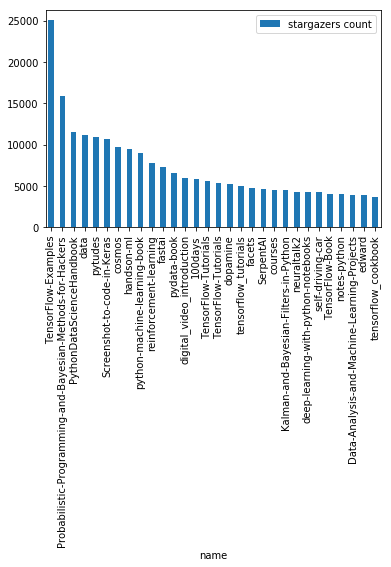

In [10]:
pd.DataFrame(df['stargazers_count'].values, index=df['name'], columns=['stargazers count']).plot(kind='bar' )